In [20]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

## Parámetros

In [21]:
long_poblacion = 100
xmin = ymin = -2
xmax = ymax = 2
long_cromosoma = round(math.log((1 + (xmax - xmin) / 0.0001), 2))
prob_cruce = 0.8
prob_mutacion = 0.05
num_generaciones = 100

x_axis = []
y_axis = []
z_axis = []

In [22]:
# Definición de la función de binario a decimal
def bin_a_dec(lb):
    n = 0
    for bit in lb:
        n = (n << 1) | bit
    return n

# Definición de la función de adaptación
def adaptacion(c):
    x = x_value(c)
    y = y_value(c)

    return 3*(1 - x)**2 * math.exp(-x**2 - (y + 1)**2) \
        - 10*(x/5 - x**3 - y**5)*math.exp(-x**2 - y**2) \
        - 1./3*math.exp(-(x + 1)**2 - y**2)

def x_value(c):
    split_index = len(c) // 2
    x_part = c[:split_index]
    return xmin + bin_a_dec(x_part) * ((xmax - xmin) / ((2**len(x_part)) - 1))

def y_value(c):
    split_index = len(c) // 2
    y_part = c[split_index:]
    return ymin + bin_a_dec(y_part) * ((ymax - ymin) / ((2**len(y_part)) - 1))

## Implementación

In [23]:
# Inicialización de la población
poblacion = [[random.randint(0, 1) for _ in range(long_cromosoma)] for _ in range(long_poblacion)]

# Algoritmo genético
for generacion in range(num_generaciones):
    print(f"\n- Generación {generacion} -")

    # Evaluación de la aptitud de cada cromosoma
    puntos_F = [adaptacion(cromosoma) for cromosoma in poblacion]

    # Mostrar el mejor cromosoma en esta generación
    best_index = puntos_F.index(max(puntos_F))
    best_cromosoma = poblacion[best_index]
    best_adapt = puntos_F[best_index]
    print(f"Mejor cromosoma: {best_cromosoma}")
    print(f"x = {x_value(best_cromosoma)}")
    print(f"y = {y_value(best_cromosoma)}")
    print(f"Adaptación (z): {best_adapt}\n")

    # Guardar puntos de los mejores cromosomas
    x_axis.append(x_value(best_cromosoma))
    y_axis.append(y_value(best_cromosoma))
    z_axis.append(best_adapt)

    # Selección de padres (en este caso, seleccionamos los mejores cromosomas)
    padres = [poblacion[i] for i in sorted(range(len(poblacion)), key=lambda i: puntos_F[i], reverse=True)[:long_poblacion // 2]]

    # Creación de la descendencia a través de cruza y mutación
    descendencia = []
    while len(descendencia) < long_poblacion:
        if random.random() < prob_cruce:
            padre1 = random.choice(padres)
            padre2 = random.choice(padres)
            punto_cruce = random.randint(1, long_cromosoma - 1)
            hijo = padre1[:punto_cruce] + padre2[punto_cruce:]  # Cruza de un punto para y
        else:
            hijo = random.choice(padres)

        # Mutación
        for i in range(long_cromosoma):
            if random.random() < prob_mutacion:
                hijo[i] = 1 - hijo[i]  # Cambio de 0 a 1 o viceversa
        
        descendencia.append(hijo)
    
    # Reemplazo de la población anterior con la nueva descendencia
    poblacion = descendencia
    if generacion != num_generaciones - 1:
        print("-" * 75)


- Generación 0 -
Mejor cromosoma: [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
x = -0.11023622047244097
y = 1.6235294117647059
Adaptación (z): 7.992843198987119

---------------------------------------------------------------------------

- Generación 1 -
Mejor cromosoma: [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
x = -0.11023622047244097
y = 1.6235294117647059
Adaptación (z): 7.992843198987119

---------------------------------------------------------------------------

- Generación 2 -
Mejor cromosoma: [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
x = 0.07874015748031482
y = 1.6235294117647059
Adaptación (z): 8.017197347147492

---------------------------------------------------------------------------

- Generación 3 -
Mejor cromosoma: [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]
x = 0.07874015748031482
y = 1.56078431372549
Adaptación (z): 8.036103001144385

---------------------------------------------------------------------------

- Generación 4 -
Mejor cromosoma: [1, 0, 0,

## Resultados

In [24]:
# Resultado final
puntos_F = [adaptacion(cromosoma) for cromosoma in poblacion]
best_index = puntos_F.index(max(puntos_F))
best_cromosoma = poblacion[best_index]
best_adapt = puntos_F[best_index]
print("> Resultado final <\n\n- Generación ", num_generaciones, " -")
print(best_cromosoma)
print(f"x = {x_value(best_cromosoma)}")
print(f"y = {y_value(best_cromosoma)}")
print(f"Adaptación (z): {best_adapt}\n")
x_axis.append(x_value(best_cromosoma))
y_axis.append(y_value(best_cromosoma))
z_axis.append(best_adapt)

> Resultado final <

- Generación  100  -
[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
x = 0.015748031496062964
y = 1.5764705882352938
Adaptación (z): 8.100659423402226



## Graficación

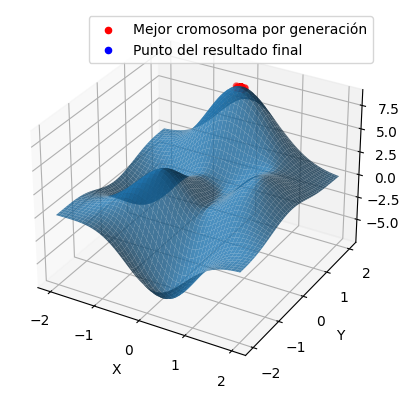

In [25]:
# Generar valores de variables para graficar la función completa
x_plot = np.linspace(xmin, xmax, 100)
y_plot = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x_plot, y_plot)
Z = 3*(1 - X)**2 * np.exp(-X**2 - (Y + 1)**2) \
    - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2 - Y**2) \
    - 1./3*np.exp(-(X + 1)**2 - Y**2)

# Graficar la función completa y la evolución de x, y, z
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.scatter(x_axis, y_axis, z_axis, c="red", label="Mejor cromosoma por generación", marker="o")
ax.scatter(x_axis[-1], y_axis[-1], z_axis, c="blue", label="Punto del resultado final", marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()